<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Part-4:-Model-Fitting" data-toc-modified-id="Part-4:-Model-Fitting-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Part 4: Model Fitting</a></span><ul class="toc-item"><li><span><a href="#Loading-back-data" data-toc-modified-id="Loading-back-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Loading back data</a></span></li><li><span><a href="#Model-Fitting" data-toc-modified-id="Model-Fitting-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Model Fitting</a></span><ul class="toc-item"><li><span><a href="#Setting-up-the-functions" data-toc-modified-id="Setting-up-the-functions-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Setting up the functions</a></span></li><li><span><a href="#Splitting-into-target-and-features" data-toc-modified-id="Splitting-into-target-and-features-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Splitting into target and features</a></span></li><li><span><a href="#Train_Test_Split" data-toc-modified-id="Train_Test_Split-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Train_Test_Split</a></span></li><li><span><a href="#Attempt-1:-Count-Vectorizer,-Multinomial-NB" data-toc-modified-id="Attempt-1:-Count-Vectorizer,-Multinomial-NB-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>Attempt 1: Count Vectorizer, Multinomial NB</a></span></li><li><span><a href="#Attempt-2:-TFIDF-Vectorizer,-Multinomial-NB" data-toc-modified-id="Attempt-2:-TFIDF-Vectorizer,-Multinomial-NB-1.2.5"><span class="toc-item-num">1.2.5&nbsp;&nbsp;</span>Attempt 2: TFIDF Vectorizer, Multinomial NB</a></span></li><li><span><a href="#Attempt-3:-TFIDF-Vectorizer,-Logistic-Regression-w-regularisation" data-toc-modified-id="Attempt-3:-TFIDF-Vectorizer,-Logistic-Regression-w-regularisation-1.2.6"><span class="toc-item-num">1.2.6&nbsp;&nbsp;</span>Attempt 3: TFIDF Vectorizer, Logistic Regression w regularisation</a></span></li><li><span><a href="#Attempt-4:-TFIDF-Vectorizer,-Support-Vector-Machines" data-toc-modified-id="Attempt-4:-TFIDF-Vectorizer,-Support-Vector-Machines-1.2.7"><span class="toc-item-num">1.2.7&nbsp;&nbsp;</span>Attempt 4: TFIDF Vectorizer, Support Vector Machines</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Conclusion</a></span></li><li><span><a href="#Next-Steps" data-toc-modified-id="Next-Steps-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Next Steps</a></span></li></ul></li></ul></div>

# Part 4: Model Fitting

In [18]:
# import packages
import logging
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from gensim.models import Word2Vec

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score,roc_curve
from sklearn.naive_bayes import BernoulliNB, GaussianNB,  MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 

%matplotlib inline
%config InlineBackend.figure_format = 'retina' # Render high resolution images

## Loading back data

In [19]:
raw = pd.read_csv("data/transformed_data.csv")

# create a working copy so that we have an untouched version to fall back on
df = raw.copy()

df.head()

,author,link_id,parent_id,num_awards,score,body,body_no_sym,body_tok,body_no_stop,body_lemma,sent_count,word_count,char_count,is_ethereum
0,crimeo,t3_op1972,t1_h63m62g,0,0,There's a very easy solution that is fiscally ...,theres a very easy solution that is fiscally r...,"there, very, easy, solution, that, is, fiscall...","easy, solution, fiscally, responsible, require...","easy, solution, fiscally, responsible, require...",7,79,475,0
1,evDev84,t3_oowzq7,t1_h62gazl,0,1,Tesla was warned beforehand. Did you see that...,tesla was warned beforehand did you see that c...,"tesla, was, warned, beforehand, did, you, see,...","tesla, warned, chan, screenshot, calling, boun...","tesla, warn, chan, screenshot, call, bounce, m...",2,22,128,0
2,arnaudmrtn,t3_op1972,t1_h63ltdv,0,1,As I mentionned I don't see any mention of sus...,as i mentionned i dont see any mention of sust...,"as, mentionned, do, nt, see, any, mention, of,...","mentionned, mention, sustainability, problem, ...","mentionne, mention, sustainability, problem, c...",2,23,141,0
3,crimeo,t3_ooa9hv,t1_h63llzz,0,1,"Yes, and there were bankruptcies when banks f...",yes and there were bankruptcies when banks fai...,"yes, and, there, were, bankruptcies, when, ban...","yes, bankruptcies, banks, failed, fact, object...","yes, bankruptcy, bank, fail, fact, objectively...",4,58,352,0
4,crimeo,t3_op1972,t1_h63lcq8,0,1,"In real life Zimbabwe TIL 5% inflation is ""H...",in real life zimbabwe til inflation is hyper i...,"in, real, life, zimbabwe, til, inflation, is, ...","real, life, zimbabwe, til, inflation, hyper, i...","real, life, zimbabwe, til, inflation, hyper, i...",11,187,1093,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3087 entries, 0 to 3086
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   author        3087 non-null   object
 1   link_id       3087 non-null   object
 2   parent_id     3087 non-null   object
 3   num_awards    3087 non-null   int64 
 4   score         3087 non-null   int64 
 5   body          3087 non-null   object
 6   body_no_sym   3087 non-null   object
 7   body_tok      3087 non-null   object
 8   body_no_stop  3087 non-null   object
 9   body_lemma    3087 non-null   object
 10  sent_count    3087 non-null   int64 
 11  word_count    3087 non-null   int64 
 12  char_count    3087 non-null   int64 
 13  is_ethereum   3087 non-null   int64 
dtypes: int64(6), object(8)
memory usage: 337.8+ KB


## Model Fitting

* Baseline Score to beat: 0.5188

In [21]:
df['is_ethereum'].mean()

0.5189504373177842

### Setting up the functions

In [22]:
# Setting up vectorizor function
def vectorize_text(col_name:str, x_train, x_test, type:str='tfidf', max_feat:int=None, ngram_range: tuple=(1,1)):
    """Extract features using different methods"""
    
    logging.info("Extracting features and creating vocabulary...")
    
    if type == 'binary':
        vect = CountVectorizer(binary=True, max_df=0.95,  max_features=max_feat, ngram_range=ngram_range)
    if type == 'count':
        vect = CountVectorizer(binary=False, max_df=0.95, max_features=max_feat, ngram_range=ngram_range)
    else: 
        vect = tfidf_vectorizer=TfidfVectorizer(use_idf=True, max_df=0.95, max_features=max_feat, ngram_range=ngram_range)

    x_train_matrix = vect.fit_transform(x_train[col_name].values)
    x_train_vect = pd.DataFrame(x_train_matrix.toarray(), columns=vect.get_feature_names())

    x_test_matrix = vect.transform(x_test[col_name].values)
    x_test_vect = pd.DataFrame(x_test_matrix.toarray(), columns=vect.get_feature_names())
    
    return x_train_vect, x_test_vect    


def plot_confusion_matrix(cm):
    modified_cm = []
    for index,value in enumerate(cm):
        if index == 0:
            modified_cm.append(['TN = ' + str(value[0]), 'FP = ' + str(value[1])])
        if index == 1:
            modified_cm.append(['FN = ' + str(value[0]), 'TP = ' + str(value[1])])

    TN = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]
    TP = cm[1][1]
    
    print("Precison: {:.3f} (TP / (TP + FP))".format(TP / (TP + FP)))
    print("Recall: {:.3f} (TP / (TP + FN))".format(TP / (TP + FN)))
    print("F1 Score: {:.3f} (2*TP / (2*TP + FN + FP))".format(2*TP / (2*TP + FN + FP)), '\n')
    
    plt.figure(figsize=(4,4))
    sns.heatmap(cm, annot=np.array(modified_cm),
                fmt="",
                annot_kws={"size": 10},
                linewidths=.5,
                square = True,
                cmap = 'Blues',
                xticklabels = ['bitcoin', 'ethereum'],
                yticklabels = ['bitcoin', 'ethereum'],
                )

    plt.ylabel('Actual label', fontsize = 10);
    plt.xlabel('Predicted label', fontsize = 10);
    plt.title('Accuracy Score: {:.3f}'.format((TN+TP) / (TN+TP+FN+FP)), size = 12);
    plt.tick_params(labelsize= 8)
    
    
def plot_roc_curve(model, x_test, y_test):    
    y_pred_prob = model.predict_proba(x_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    # Plot ROC curve
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()
    print('AUC Score: {:.3f}'.format(roc_auc_score(y_test, y_pred_prob))   ) 
    
# Setting up the model fitting function            
def train_model(model, name, x_train, x_test, y_train, y_test):
    
    model.fit(x_train, np.ravel(y_train))
    test_preds = model.predict(x_test)
    print("\n\nTRAIN SCORES: {}".format(name))
    print("-"*100)
    scores = cross_val_score(model, y_train, model.predict(x_train), cv=5, scoring='accuracy')
    print('cross val train scores: {}, with mean score {}'.format(scores, scores.mean()))
#     print("\n\nTEST SCORES: {}".format(name))
#     print("-"*100)
    
#     scores = cross_val_score(model, x_test_ss, y_test, cv=10) 
#     print('cross val test scores: {}, with mean score {}'.format(scores, scores.mean()))
    
    print("\n\nACCURACY SCORE: {}".format(name))
    print("-"*100)

    # Check the R^2 on the training and testing sets.
    print('cross val score on training set: {}'.format(cross_val_score(model, y_train, model.predict(x_train), cv=5, scoring='accuracy').mean()))
    #print('accuracy score on testing set: {}'.format(cross_val_score(model, y_test, test_preds, cv=5, scoring='accuracy').mean()))
    #score = accuracy_score(y_test, test_preds)
    print(f'accuracy score on testing set: {accuracy_score(y_test, test_preds)}')  
    
    print("\n\nCLASSIFICATION REPORT: {}".format(name))
    print("-"*100)
    print(classification_report(y_test, test_preds))
    
    try:
        plot_roc_curve(model, x_test, y_test)
    except Exception as e:
            print('***NOTE: ROC CURVE not available as {}***'.format(e).upper().strip()    )
    else:
        pass
    
    print("\n\nCONFUSION MATRIX: {}".format(name))
    print("-"*100)
    cm = confusion_matrix(y_test, test_preds)
    plot_confusion_matrix(cm)
    
#     try:
#         print(np.exp(model.feature_log_prob_))
#     except Exception as e:
#             print('***NOTE:feat importances not available as {}***'.format(e).upper().strip()    )
#     else:
#         pass
    
    #print(confusion_matrix(y_test, test_preds))
    #print("-"*100)

In [23]:
# Initialising the models
bnb = BernoulliNB() 
gnb = GaussianNB()
mnb = MultinomialNB()
svc = SVC(C=0.5, kernel='linear', gamma='auto')

### Splitting into target and features

In [24]:
# Splitting into target and features
x = df.iloc[:, 0:-2]
num_col = ['num_awards', 'sent_count', 'word_count', 'char_count']

# Negative index means to search from back to front
# -1 means retrieve the last column
y = df.iloc[:, -1].to_frame()
print(x.columns)
print(y.columns)

Index(['author', 'link_id', 'parent_id', 'num_awards', 'score', 'body',
       'body_no_sym', 'body_tok', 'body_no_stop', 'body_lemma', 'sent_count',
       'word_count'],
      dtype='object')
Index(['is_ethereum'], dtype='object')


### Train_Test_Split

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=89, shuffle=True, stratify=y)

### Attempt 1: Count Vectorizer, Multinomial NB
* The accuracy score on test set seems decent at 0.796 and is not less than the score for train set, indicating no overfitting issues.
* However, the huge dip in train set score (0.506) seems to indicate underfitting
* The big difference between the two scores also imply that the model is not very stable for this application



TRAIN SCORES: MultiNomial NB
----------------------------------------------------------------------------------------------------
cross val train scores: [0.50694444 0.50694444 0.50694444 0.50694444 0.50462963], with mean score 0.5064814814814815


ACCURACY SCORE: MultiNomial NB
----------------------------------------------------------------------------------------------------
cross val score on training set: 0.5064814814814815
accuracy score on testing set: 0.7961165048543689


CLASSIFICATION REPORT: MultiNomial NB
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.76      0.83      0.80       446
           1       0.83      0.76      0.79       481

    accuracy                           0.80       927
   macro avg       0.80      0.80      0.80       927
weighted avg       0.80      0.80      0.80       927



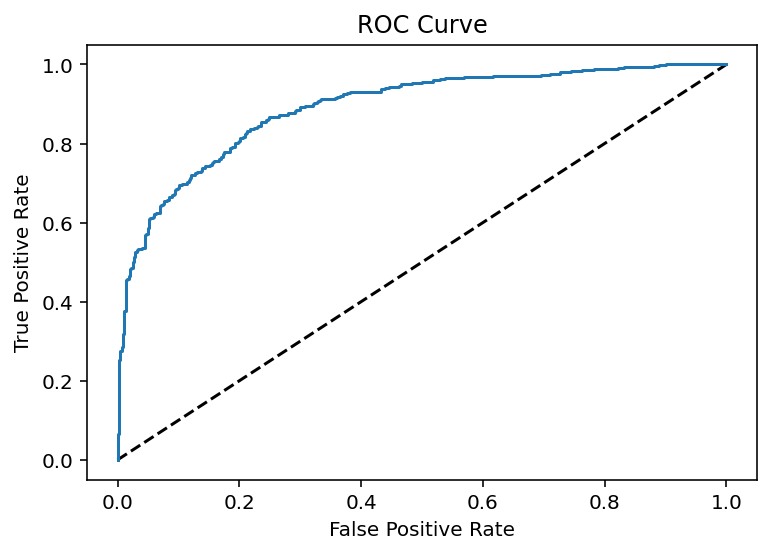

AUC Score: 0.891


CONFUSION MATRIX: MultiNomial NB
----------------------------------------------------------------------------------------------------
Precison: 0.832 (TP / (TP + FP))
Recall: 0.761 (TP / (TP + FN))
F1 Score: 0.795 (2*TP / (2*TP + FN + FP)) 



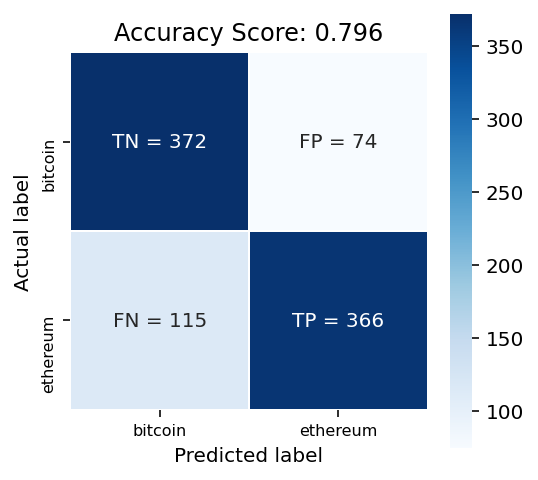

In [26]:
#max_feat = int(x_train_vec.shape[1] * 0.95)
x_train_vec, x_test_vec = vectorize_text(col_name='body_no_stop', x_train=x_train, x_test=x_test, type='count', max_feat=2850, ngram_range=(1,1))
train_model(mnb, "MultiNomial NB",  x_train_vec, x_test_vec, y_train, y_test)

### Attempt 2: TFIDF Vectorizer, Multinomial NB



TRAIN SCORES: MultiNomial NB
----------------------------------------------------------------------------------------------------
cross val train scores: [0.51851852 0.51851852 0.52083333 0.52083333 0.52083333], with mean score 0.5199074074074075


ACCURACY SCORE: MultiNomial NB
----------------------------------------------------------------------------------------------------
cross val score on training set: 0.5199074074074075
accuracy score on testing set: 0.8155339805825242


CLASSIFICATION REPORT: MultiNomial NB
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.77      0.80       446
           1       0.80      0.86      0.83       481

    accuracy                           0.82       927
   macro avg       0.82      0.81      0.81       927
weighted avg       0.82      0.82      0.81       927



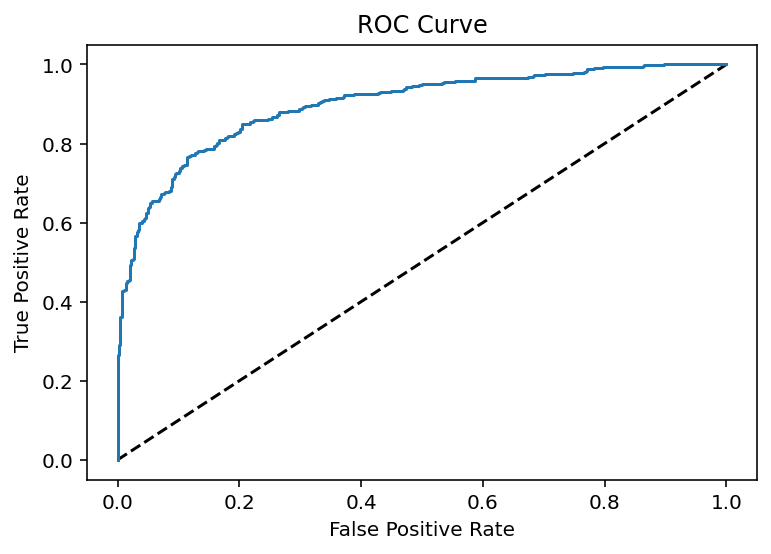

AUC Score: 0.899


CONFUSION MATRIX: MultiNomial NB
----------------------------------------------------------------------------------------------------
Precison: 0.799 (TP / (TP + FP))
Recall: 0.861 (TP / (TP + FN))
F1 Score: 0.829 (2*TP / (2*TP + FN + FP)) 



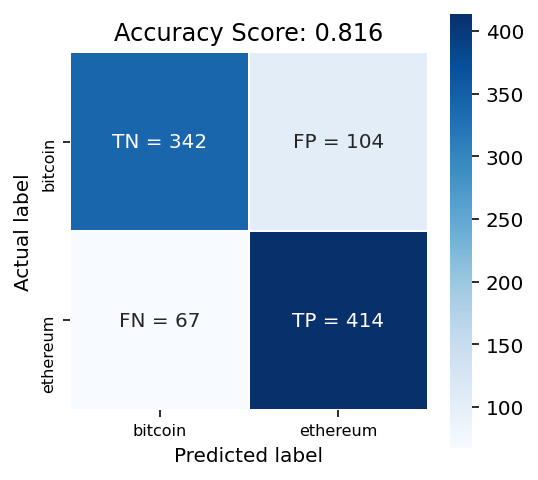

In [27]:
x_train_vec, x_test_vec = vectorize_text(col_name='body_lemma', x_train=x_train, x_test=x_test, type='tfidf',   ngram_range=(1,3))
train_model(mnb, "MultiNomial NB",  x_train_vec, x_test_vec, y_train, y_test)

### Attempt 3: TFIDF Vectorizer, Logistic Regression w regularisation
* The accuracy score on test set also seems decent at 0.800
* However, when compared to the train set scores at 0.97, the huge 20% gap indicates overfitting issues with the model



TRAIN SCORES: Logistic Reg
----------------------------------------------------------------------------------------------------
cross val train scores: [0.96759259 0.96759259 0.9837963  0.97685185 0.96527778], with mean score 0.9722222222222221


ACCURACY SCORE: Logistic Reg
----------------------------------------------------------------------------------------------------
cross val score on training set: 0.9722222222222221
accuracy score on testing set: 0.8004314994606256


CLASSIFICATION REPORT: Logistic Reg
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       446
           1       0.82      0.78      0.80       481

    accuracy                           0.80       927
   macro avg       0.80      0.80      0.80       927
weighted avg       0.80      0.80      0.80       927



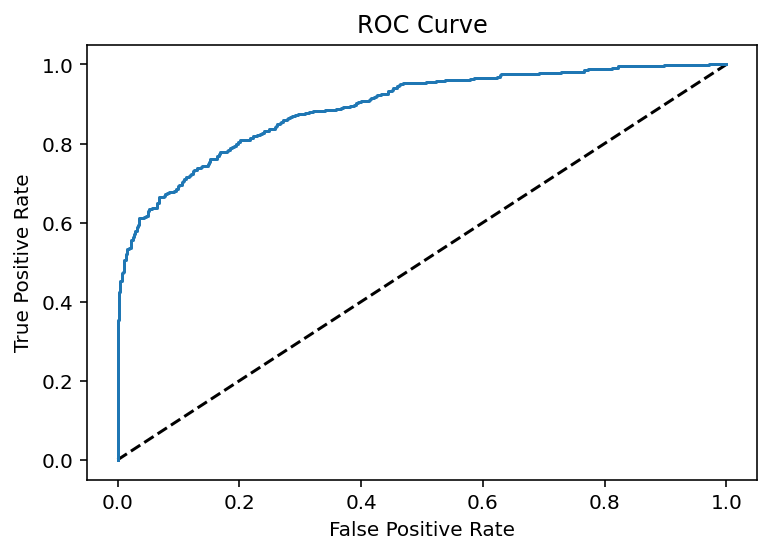

AUC Score: 0.892


CONFUSION MATRIX: Logistic Reg
----------------------------------------------------------------------------------------------------
Precison: 0.825 (TP / (TP + FP))
Recall: 0.782 (TP / (TP + FN))
F1 Score: 0.803 (2*TP / (2*TP + FN + FP)) 



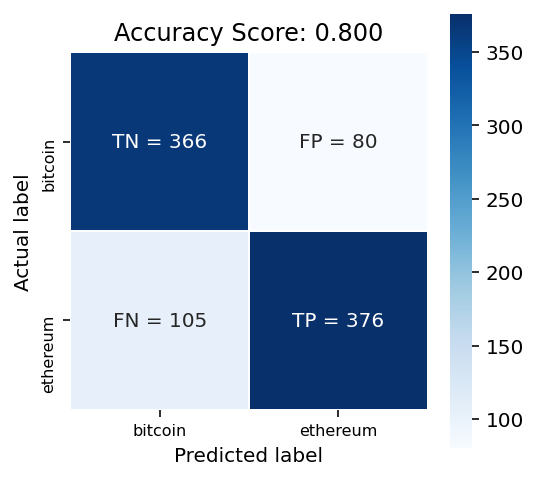

In [28]:
logreg = LogisticRegression(C=2.5, penalty='l2', dual=True, solver='liblinear')
x_train_vec, x_test_vec = vectorize_text(col_name='body_lemma', x_train=x_train, x_test=x_test, type='tfidf',   ngram_range=(1,1))
train_model(logreg, "Logistic Reg",  x_train_vec, x_test_vec, y_train, y_test)

### Attempt 4: TFIDF Vectorizer, Support Vector Machines
* Similar issue ti Attempt 4 happening here
* The accuracy score on test set also seems decent at 0.802
* However, when compared to the train set scores at 0.97, the huge 20% gap indicates overfitting issues with the model



TRAIN SCORES: SVM
----------------------------------------------------------------------------------------------------
cross val train scores: [0.97222222 0.96527778 0.97916667 0.97222222 0.95833333], with mean score 0.9694444444444444


ACCURACY SCORE: SVM
----------------------------------------------------------------------------------------------------
cross val score on training set: 0.9694444444444444
accuracy score on testing set: 0.8025889967637541


CLASSIFICATION REPORT: SVM
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.77      0.84      0.80       446
           1       0.84      0.77      0.80       481

    accuracy                           0.80       927
   macro avg       0.80      0.80      0.80       927
weighted avg       0.81      0.80      0.80       927

***NOTE: ROC CURVE NOT AVAILABLE AS PREDICT_PROBA IS NOT AVAILABLE WHEN  PROBABI

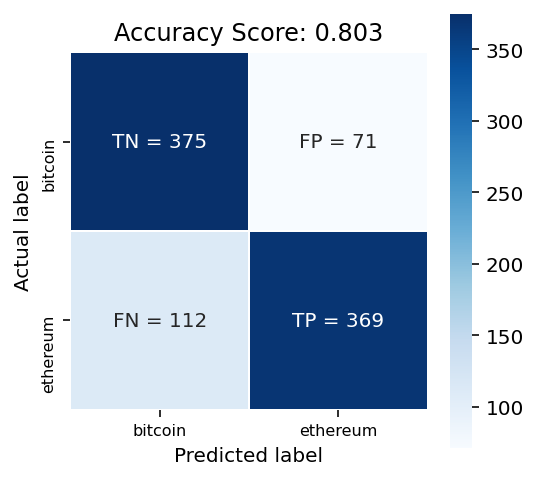

In [29]:

svc = SVC(C=1.0, kernel='linear')
x_train_vec, x_test_vec = vectorize_text(col_name='body_lemma', x_train=x_train, x_test=x_test, type='tfidf',   ngram_range=(1,1))
train_model(svc, "SVM",  x_train_vec, x_test_vec, y_train, y_test)

## Conclusion
* All models tested did not fare well with the task of classifying between bitcoin and etheruem due to issues with overfitting or underfitting
* This is likely due to the low quality of the data. Although with comments, the text tend to be long, the probability of getting generic comments, with little or no signal, is high. 
    * A case in point, the removal of comments below 100 character lead to a 10% increase in accuracy!
* On the training end, this interferes with the model's learning process in identifying signals that are important for classification.
* On the testing end, the test set do not provide a good representation of reality as users who use the chatbot are often looking for something. Hence, their messsages will tend to be filled with signals that will be useful for classification.

## Next Steps
* Moving on, we will need to tap on richer sources of data, with better data quality. For example, we could look at reddit posts or cryptocurrency news.
* we will also need to increase the time scope to at least the last 6 months. In this study, only 9 days of data was used
